In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/My Drive/Colab Notebooks/Data_Mining/Toxic Comment Analysis/'

In [4]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

"Un-Comment For Running locally out of colab\npath='./dataset'\n"

In [5]:
import pandas as pd
import numpy as np

In [6]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
labels = pd.read_csv(path + "test_labels.csv")

In [7]:
train = train[:100000]
classes = list(train.columns)[2:]
classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [8]:
links = '(http://.*?\s)|(http://.*)'
ip_addr = '\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
users = '\[\[User.*'
newline = '\\n'
def clean(comment):
  import re
  comment=comment.lower()
  comment=re.sub(links,'',comment)
  comment=re.sub(ip_addr,'',comment)
  comment=re.sub(users,'',comment)
  comment=re.sub(newline,'',comment)
  return comment

In [9]:
train['comment_text']=train['comment_text'].map(lambda i:clean(i))
test['comment_text']=test['comment_text'].map(lambda i:clean(i))

In [10]:
x=train['comment_text']
y=train.iloc[:,2:8]
print(x.shape)
print(y.shape)

(100000,)
(100000, 6)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=1)

In [12]:
labels = pd.read_csv(path + "test_labels.csv")
labels=labels.iloc[:,1:]
sum_labels=np.sum(labels,axis=1)
idx=sum_labels>=0

In [13]:
labels_consider=labels[idx]
test=test.iloc[:,1:]
tests_consider=test[idx].values[:,0]

print(labels_consider.shape, tests_consider.shape)

(63978, 6) (63978,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,strip_accents='unicode',stop_words='english',token_pattern=r'\w{2,}')

In [16]:
tfidf.fit(X_train)
X_train_feat=tfidf.fit_transform(X_train)
print(X_train_feat.shape)

X_val_feat=tfidf.transform(X_val)
print(X_val_feat.shape)

X_test_feat=tfidf.transform(tests_consider)
print(X_test_feat.shape)

(80000, 5000)
(20000, 5000)
(63978, 5000)


In [17]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.0MB/s 


In [18]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000, 6)


In [18]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

model_br = BinaryRelevance(classifier = SVC(), require_dense = [False, True])
model_br.fit(X_train_feat, y_train)

BinaryRelevance(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                require_dense=[False, True])

In [19]:
preds_train = model_br.predict(X_train_feat)

In [36]:
from sklearn.metrics import roc_auc_score, accuracy_score

print(roc_auc_score(y_train, preds_train.toarray()))

0.7689564894630726


In [ ]:
preds_val = model_br.predict(X_val_feat)


In [37]:
print(roc_auc_score(y_val, preds_val.toarray()))

0.6665239237377513


In [22]:
preds_test = model_br.predict(X_test_feat)

In [38]:
print(roc_auc_score(labels_consider, preds_test.toarray()))

0.6636501540392014


In [19]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC

model_cc = ClassifierChain(classifier = SVC(), require_dense = [False, True])
model_cc.fit(X_train_feat, y_train)

ClassifierChain(classifier=SVC(C=1.0, break_ties=False, cache_size=200,
                               class_weight=None, coef0=0.0,
                               decision_function_shape='ovr', degree=3,
                               gamma='scale', kernel='rbf', max_iter=-1,
                               probability=False, random_state=None,
                               shrinking=True, tol=0.001, verbose=False),
                order=None, require_dense=[False, True])

In [20]:
preds_train = model_cc.predict(X_train_feat)


In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score

print(roc_auc_score(y_train, preds_train.toarray()))

0.7645674561502386


In [ ]:
preds_val = model_cc.predict(X_val_feat)


In [34]:
print(roc_auc_score(y_val, preds_val.toarray()))

0.6751504109269661


In [22]:
preds_test = model_cc.predict(X_test_feat)

In [35]:
print(roc_auc_score(labels_consider, preds_test.toarray()))

0.6718590534519624


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/My Drive/Colab Notebooks/Data_Mining/Toxic Comment Analysis/'

In [3]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

"Un-Comment For Running locally out of colab\npath='./dataset'\n"

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [6]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [7]:
train = train[:100000]
train.describe()

toxic  severe_toxic  ...         insult  identity_hate
count  100000.000000  100000.00000  ...  100000.000000  100000.000000
mean        0.096120       0.00999  ...       0.049670       0.008540
std         0.294757       0.09945  ...       0.217263       0.092017
min         0.000000       0.00000  ...       0.000000       0.000000
25%         0.000000       0.00000  ...       0.000000       0.000000
50%         0.000000       0.00000  ...       0.000000       0.000000
75%         0.000000       0.00000  ...       0.000000       0.000000
max         1.000000       1.00000  ...       1.000000       1.000000

[8 rows x 6 columns]

In [8]:
classes = list(train.columns)[2:]
classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [9]:
train[classes].sum()

toxic            9612
severe_toxic      999
obscene          5327
threat            314
insult           4967
identity_hate     854
dtype: int64

In [10]:
links = '(http://.*?\s)|(http://.*)'
ip_addr = '\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
users = '\[\[User.*'
newline = '\\n'
print(train['comment_text'].str.contains(links).sum())
print(train['comment_text'].str.contains(ip_addr).sum())
print(train['comment_text'].str.contains(users).sum())
print(train['comment_text'].str.contains(newline).sum())

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


2766
6313
196
59357


In [11]:
def clean(comment):
  import re
  comment=comment.lower()
  comment=re.sub(links,'',comment)
  comment=re.sub(ip_addr,'',comment)
  comment=re.sub(users,'',comment)
  comment=re.sub(newline,'',comment)
  return comment

In [12]:
train['comment_text']=train['comment_text'].map(lambda i:clean(i))
test['comment_text']=test['comment_text'].map(lambda i:clean(i))

In [13]:
print(train['comment_text'].str.contains(links).sum())
print(train['comment_text'].str.contains(ip_addr).sum())
print(train['comment_text'].str.contains(users).sum())
print(train['comment_text'].str.contains(newline).sum())

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0
0
0
0


In [14]:
x=train['comment_text']
y=train.iloc[:,2:8]
print(x.shape)
print(y.shape)

(100000,)
(100000, 6)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf=TfidfVectorizer(max_features=5000,strip_accents='unicode',stop_words='english',token_pattern=r'\w{2,}')

In [18]:
tfidf.fit(X_train)
X_train_feat=tfidf.fit_transform(X_train)
X_train_feat.shape

(80000, 5000)

In [19]:
X_val_feat=tfidf.transform(X_val)
X_val_feat.shape

(20000, 5000)

In [20]:
import numpy as np

labels = pd.read_csv(path + "test_labels.csv")
labels=labels.iloc[:,1:]
sum_labels=np.sum(labels,axis=1)
idx=sum_labels>=0

In [21]:
labels_consider=labels[idx]
test=test.iloc[:,1:]
tests_consider=test[idx].values[:,0]

print(labels_consider.shape, tests_consider.shape)

(63978, 6) (63978,)


In [22]:
X_test_feat=tfidf.transform(tests_consider)
X_test_feat.shape

(63978, 5000)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model=LogisticRegression(C=20.0, max_iter=1000000)

In [24]:
## Binary Relevance

In [25]:
scores_roc_aoc = []

for label_name in classes:
    print('Class:', label_name)

    model.fit(X_train_feat, y_train[label_name])
    preds_train = model.predict(X_train_feat)
    train_roc_auc = roc_auc_score(y_train[label_name], preds_train)
    print('Train ROC AUC Score:', train_roc_auc)

    preds_val = model.predict(X_val_feat)
    val_roc_auc = roc_auc_score(y_val[label_name], preds_val)
    print('Val ROC AUC Score:', val_roc_auc)

    preds_test = model.predict(X_test_feat)
    test_roc_auc = roc_auc_score(labels_consider[label_name], preds_test)
    print('Test ROC AUC Score:', test_roc_auc)
    scores_roc_aoc.append(test_roc_auc)

    print()


print(np.mean(scores_roc_aoc))

Class: toxic
Train ROC AUC Score: 0.8641180051831711
Val ROC AUC Score: 0.8207180907734924
Test ROC AUC Score: 0.8417549380219865

Class: severe_toxic
Train ROC AUC Score: 0.7354769544912093
Val ROC AUC Score: 0.6133964600570482
Test ROC AUC Score: 0.6809342308240435

Class: obscene
Train ROC AUC Score: 0.8928312440198478
Val ROC AUC Score: 0.848488716614316
Test ROC AUC Score: 0.8235366774921389

Class: threat
Train ROC AUC Score: 0.8161114861718565
Val ROC AUC Score: 0.6307964702177707
Test ROC AUC Score: 0.6367507462186276

Class: insult
Train ROC AUC Score: 0.8373195677328823
Val ROC AUC Score: 0.7741099340770253
Test ROC AUC Score: 0.7691786795569605

Class: identity_hate
Train ROC AUC Score: 0.7554634080871397
Val ROC AUC Score: 0.6637757907724186
Test ROC AUC Score: 0.6410308739237967

0.732197691006259


In [101]:
## Classifier chains

In [26]:
from scipy.sparse import hstack, csr_matrix

def add_feat(x, feat):
  return hstack([x, csr_matrix(feat).T], 'csr')

In [27]:
scores_roc_aoc = []

for label_name in classes:
    print('Class:', label_name)

    model.fit(X_train_feat, y_train[label_name])
    preds_train = model.predict(X_train_feat)
    train_roc_auc = roc_auc_score(y_train[label_name], preds_train)
    print('Train ROC AUC Score:', train_roc_auc)

    preds_val = model.predict(X_val_feat)
    val_roc_auc = roc_auc_score(y_val[label_name], preds_val)
    print('Val ROC AUC Score:', val_roc_auc)

    preds_test = model.predict(X_test_feat)
    test_roc_auc = roc_auc_score(labels_consider[label_name], preds_test)
    print('Test ROC AUC Score:', test_roc_auc)
    scores_roc_aoc.append(test_roc_auc)

    X_train_feat = add_feat(X_train_feat, y_train[label_name])
    X_val_feat = add_feat(X_val_feat, y_val[label_name])
    X_test_feat = add_feat(X_test_feat, labels_consider[label_name])
    print(X_train_feat.shape)
    print(X_val_feat.shape)
    print(X_test_feat.shape)
    print()

print(np.mean(scores_roc_aoc))

Class: toxic
Train ROC AUC Score: 0.8641180051831711
Val ROC AUC Score: 0.8207180907734924
Test ROC AUC Score: 0.8417549380219865
(80000, 5001)
(20000, 5001)
(63978, 5001)

Class: severe_toxic
Train ROC AUC Score: 0.7721650129423699
Val ROC AUC Score: 0.6035140679772546
Test ROC AUC Score: 0.6590887040469968
(80000, 5002)
(20000, 5002)
(63978, 5002)

Class: obscene
Train ROC AUC Score: 0.9234533404235623
Val ROC AUC Score: 0.8675645938826668
Test ROC AUC Score: 0.8500987669308729
(80000, 5003)
(20000, 5003)
(63978, 5003)

Class: threat
Train ROC AUC Score: 0.8675074250380068
Val ROC AUC Score: 0.6390182680125203
Test ROC AUC Score: 0.6559903698573234
(80000, 5004)
(20000, 5004)
(63978, 5004)

Class: insult
Train ROC AUC Score: 0.9184486401928967
Val ROC AUC Score: 0.8533773949449052
Test ROC AUC Score: 0.8562945106040277
(80000, 5005)
(20000, 5005)
(63978, 5005)

Class: identity_hate
Train ROC AUC Score: 0.8589558179147085
Val ROC AUC Score: 0.7046630405520065
Test ROC AUC Score: 0.699

In [ ]:
path_train='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/train.csv'
path_test='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/test.csv'

In [ ]:
import pandas as pd

In [ ]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [ ]:
vocab = pd.concat([train['comment_text'],  test['comment_text']])

In [ ]:
clean_word_dict={'ａ': 'a',
 '！': ' !',
 '＋': ' +',
 '－': ' -',
 '．': ' .',
 '０': '0',
 '１': '1',
 '２': '2',
 '３': '3',
 '４': '4',
 '５': '5',
 '６': '6',
 '７': '7',
 '８': '8',
 '９': '9',
 '＝': ' =',
 '？': ' ?',
 'Ａ': 'a',
 'Ｂ': 'b',
 'Ｃ': 'c',
 'Ｄ': 'd',
 'Ｅ': 'e',
 'Ｆ': 'f',
 'Ｇ': 'g',
 'Ｈ': 'h',
 'Ｉ': 'i',
 'Ｊ': 'j',
 'Ｋ': 'k',
 'Ｌ': 'l',
 'Ｍ': 'm',
 'Ｎ': 'n',
 'Ｏ': 'o',
 'Ｐ': 'p',
 'Ｑ': 'q',
 'Ｒ': 'r',
 'Ｓ': 's',
 'Ｔ': 't',
 'Ｕ': 'u',
 'Ｖ': 'v',
 'Ｗ': 'w',
 'Ｘ': 'x',
 'Ｙ': 'y',
 'Ｚ': 'z',
 'ｂ': 'b',
 'ｃ': 'c',
 'ｄ': 'd',
 'ｅ': 'e',
 'ｆ': 'f',
 'ｇ': 'g',
 'ｈ': 'h',
 'ｉ': 'i',
 'ｊ': 'j',
 'ｋ': 'k',
 'ｌ': 'l',
 'ｍ': 'm',
 'ｎ': 'n',
 'ｏ': 'o',
 'ｐ': 'p',
 'ｑ': 'q',
 'ｒ': 'r',
 'ｓ': 's',
 'ｔ': 't',
 'ｕ': 'u',
 'ｖ': 'v',
 'ｗ': 'w',
 'ｘ': 'x',
 'ｙ': 'y',
 'ｚ': 'z'}

In [ ]:
import re
import string
def clean_dataset(word):
    word = word.lower()
    word = re.sub(r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)", "", word)
    word = re.sub(r"(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)){3}", "", word)
    for typo, correct in clean_word_dict.items():
        word = re.sub(typo, " " + correct + " ", word)
    symbols = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
    word=symbols.sub(r' \1 ', word)
    return word

train_comments = []
test_comments = []
for comment in train['comment_text']:
    train_comments.append(clean_dataset(comment))
    
for comment in test['comment_text']:
    test_comments.append(clean_dataset(comment))

In [ ]:
transform_function = TfidfVectorizer(
    sublinear_tf=1,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    max_features=10000)

In [ ]:
transform_function.fit(vocab)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=True, vocabulary=None)

In [ ]:
comments_train = transform_function.transform(train_comments)
comments_test = transform_function.transform(test_comments)

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

losses = []
predictions = []
for class_name in class_names:
    train_target = train[class_name]
    classifier = ExtraTreesClassifier(n_estimators=30) 
    score = np.mean(cross_val_score(classifier, comments_train, train_target, cv=2, scoring='roc_auc'))
    print(class_name, score)  
    classifier.fit(comments_train, train_target)
    predictions.append(classifier.predict_proba(comments_test)[:, 1])

toxic 0.9483975859448478
severe_toxic 0.9356866512204218
obscene 0.972690700510528
threat 0.8646456662150368
insult 0.9551477410459125
identity_hate 0.8819367764977541


In [ ]:
labels=pd.read_csv('/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/test_labels.csv')
labels=np.array(labels.iloc[:,1:])
sum_labels=np.sum(labels,axis=1)
idx=sum_labels>=0

In [ ]:
preds_consider=np.array(predictions)[:,idx]
labels_consider= labels[idx]
preds_consider.shape,labels_consider.shape

((6, 63978), (63978, 6))

In [ ]:
from sklearn.metrics import roc_auc_score
scores=[]
for i in range(6):
  scores.append(roc_auc_score(labels_consider[:,i],preds_consider[i,:]))
np.mean(scores)

0.9323676675669743

In [ ]:
import numpy as np

In [ ]:
path_train='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/train.csv'
path_test='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/test.csv'

In [ ]:
import pandas as pd
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train['comment_text'],train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']], test_size=0.2, random_state=2)

In [ ]:
import re, string
symbols = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return symbols.sub(r' \1 ', s).split()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
transform_function = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1).fit(train['comment_text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
comments_train = transform_function.transform(train_x)
comments_val = transform_function.transform(val_x)
comments_test = transform_function.transform(test['comment_text'])

In [ ]:
train_x = pd.DataFrame(train_x)
val_x = pd.DataFrame(val_x)

In [ ]:
combined = [train_x, val_x, test]

In [ ]:
col = ['total_length', 'capitals', 'caps_vs_length','num_exclamation_marks', 'num_question_marks', 'num_punctuation','num_symbols', 'num_words', 'num_unique_words', 'words_vs_unique','num_smilies']

In [ ]:
for data in combined:
    data['total_length'] = data['comment_text'].apply(len)
    data['capitals'] = data['comment_text'].apply(lambda x: sum(1 for c in x if c.isupper()))
    data['caps_vs_length'] = data.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
    data['num_exclamation_marks'] = data['comment_text'].apply(lambda x: x.count('!'))
    data['num_question_marks'] = data['comment_text'].apply(lambda x: x.count('?'))
    data['num_punctuation'] = data['comment_text'].apply(lambda x: sum(x.count(w) for w in '.,;:'))
    data['num_symbols'] = data['comment_text'].apply(lambda x: sum(x.count(w) for w in '*&$%'))
    data['num_words'] = data['comment_text'].apply(lambda x: len(x.split()))
    data['num_unique_words'] = data['comment_text'].apply(lambda x: len(set(w for w in x.split())))
    data['words_vs_unique'] = data['num_unique_words'] / data['num_words']
    data['num_smilies'] = data['comment_text'].apply(lambda x: sum(x.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [ ]:
import scipy
train_x = scipy.sparse.csr_matrix(train_x[col].values)
val_x = scipy.sparse.csr_matrix(val_x[col].values)
test = scipy.sparse.csr_matrix(test[col].values)

In [ ]:
comments_train = scipy.sparse.hstack([train_x.tocsr(),comments_train.tocsr()])
comments_val = scipy.sparse.hstack([val_x,comments_val])
comments_test = scipy.sparse.hstack([test,comments_test])

In [ ]:
import xgboost as xgb

In [ ]:
def run(train_X, train_y, test_X, test_y=None, feature_names=None):
    dic = {}
    dic['objective'] = 'binary:logistic'
    dic['eta'] = 0.1
    dic['max_depth'] = 6
    dic['silent'] = 1
    dic['eval_metric'] = 'auc'
    dic['min_child_weight'] = 1
    dic['subsample'] = 0.7
    dic['colsample_bytree'] = 0.7
    num = 100
    list_dic = list(dic.items())

    xgtrain = xgb.DMatrix(train_X, label=train_y)
    xgtest = xgb.DMatrix(test_X, label=test_y)

    model = xgb.train(list_dic, xgtrain, num, [ (xgtrain,'train'), (xgtest, 'test') ], early_stopping_rounds=10)

    return model 

In [ ]:
col = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
preds = np.zeros((test.shape[0], len(col)))

for i, j in enumerate(col):
    print('fit '+j)
    model = run(comments_train, train_y[j], comments_val,val_y[j])
    preds[:,i] = model.predict(xgb.DMatrix(comments_test), ntree_limit = model.best_ntree_limit)
    gc.collect()

fit toxic
[0]	train-auc:0.701894	test-auc:0.699906
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 10 rounds.
[1]	train-auc:0.720606	test-auc:0.71772
[2]	train-auc:0.761526	test-auc:0.756648
[3]	train-auc:0.812048	test-auc:0.803294
[4]	train-auc:0.820223	test-auc:0.813418
[5]	train-auc:0.82538	test-auc:0.81726
[6]	train-auc:0.853074	test-auc:0.845996
[7]	train-auc:0.85293	test-auc:0.845771
[8]	train-auc:0.864441	test-auc:0.855824
[9]	train-auc:0.873903	test-auc:0.866073
[10]	train-auc:0.881353	test-auc:0.873859
[11]	train-auc:0.885842	test-auc:0.879595
[12]	train-auc:0.887051	test-auc:0.881328
[13]	train-auc:0.894386	test-auc:0.889244
[14]	train-auc:0.899532	test-auc:0.894405
[15]	train-auc:0.903192	test-auc:0.897181
[16]	train-auc:0.904132	test-auc:0.896953
[17]	train-auc:0.906056	test-auc:0.898806
[18]	train-auc:0.906139	test-auc:0.89896
[19]	train-auc:0.909253	test-auc:0.901529
[20]	train-auc:0.911407	

In [ ]:
labels=pd.read_csv('/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/test_labels.csv')
labels=np.array(labels.iloc[:,1:])
sum_labels=np.sum(labels,axis=1)
idx=sum_labels>=0

In [ ]:
preds_consider=preds[idx]
labels_consider= labels[idx]
preds_consider.shape,labels_consider.shape

((63978, 6), (63978, 6))

In [ ]:
from sklearn.metrics import roc_auc_score
scores=[]
for i in range(6):
  scores.append(roc_auc_score(labels_consider[:,i],preds_consider[:,i]))
np.mean(scores)

0.9635699477762086

In [ ]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [ ]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

Check for Null Values in the dataset

In [ ]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

Add Lemmatisation

In [ ]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [ ]:
tokenizer.word_counts

OrderedDict([('explanation\r', 9),
             ('why', 17810),
             ('the', 496418),
             ('edits', 9891),
             ('made', 9672),
             ('under', 7000),
             ('my', 45610),
             ('username', 1816),
             ('hardcore', 166),
             ('metallica', 35),
             ('fan', 1020),
             ('were', 15417),
             ('reverted', 3893),
             ('they', 27309),
             ("weren't", 424),
             ('vandalisms', 38),
             ('just', 27804),
             ('closure', 87),
             ('on', 89904),
             ('some', 22581),
             ('gas', 331),
             ('after', 8487),
             ('i', 204349),
             ('voted', 302),
             ('at', 39508),
             ('new', 10659),
             ('york', 896),
             ('dolls', 23),
             ('fac', 313),
             ('and', 224021),
             ('please', 29742),
             ("don't", 22913),
             ('remove', 5134),
           

In [ ]:
tokenizer.word_index

{'the': 1,
 '\r': 2,
 'to': 3,
 'of': 4,
 'and': 5,
 'a': 6,
 'you': 7,
 'i': 8,
 'is': 9,
 'that': 10,
 'in': 11,
 'it': 12,
 'for': 13,
 'this': 14,
 'not': 15,
 'on': 16,
 'be': 17,
 'as': 18,
 'have': 19,
 'are': 20,
 'your': 21,
 'with': 22,
 'if': 23,
 'article': 24,
 'was': 25,
 'or': 26,
 'but': 27,
 'my': 28,
 'page': 29,
 'an': 30,
 'wikipedia': 31,
 'from': 32,
 'by': 33,
 'do': 34,
 'at': 35,
 'about': 36,
 'me': 37,
 'so': 38,
 'talk': 39,
 'what': 40,
 'can': 41,
 'there': 42,
 'all': 43,
 'has': 44,
 'will': 45,
 'please': 46,
 'no': 47,
 'would': 48,
 'one': 49,
 'like': 50,
 'just': 51,
 'they': 52,
 'he': 53,
 'which': 54,
 'any': 55,
 'been': 56,
 'should': 57,
 'more': 58,
 'we': 59,
 "don't": 60,
 'some': 61,
 'other': 62,
 'who': 63,
 'see': 64,
 'here': 65,
 'also': 66,
 'his': 67,
 'think': 68,
 'because': 69,
 'know': 70,
 'how': 71,
 'am': 72,
 'edit': 73,
 "i'm": 74,
 'why': 75,
 'people': 76,
 'up': 77,
 'only': 78,
 "it's": 79,
 'out': 80,
 'use': 81,
 'whe

In [ ]:
list_tokenized_train[:1]

[[75,
  1,
  128,
  130,
  177,
  28,
  670,
  4510,
  12133,
  1115,
  87,
  331,
  52,
  2269,
  11510,
  51,
  6926,
  16,
  61,
  2747,
  149,
  8,
  2933,
  35,
  116,
  1235,
  15747,
  2859,
  5,
  46,
  60,
  243,
  1,
  370,
  32,
  1,
  39,
  29,
  144,
  74,
  3474,
  90,
  3075,
  4630,
  2284,
  985]]

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Check which maxlen is better


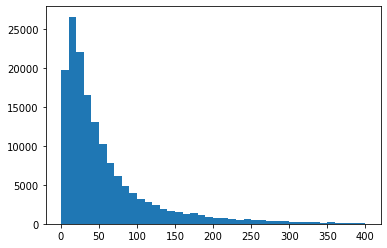

In [ ]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

In [ ]:
inp = Input(shape=(maxlen, ))

In [ ]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [ ]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [ ]:
from keras.layers import Bidirectional, GlobalMaxPool1D

In [ ]:
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)

In [ ]:
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
from keras.models import Model
import keras.metrics as metrics

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[
                          metrics.MeanSquaredError(),
                          metrics.AUC(),
                  ])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_t,y,test_size=0.1,random_state=1) 

In [ ]:
batch_size = 32
epochs = 2
model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2
4488/4488 [==============================] - 173s 39ms/step - loss: 0.0683 - mean_squared_error: 0.0184 - auc: 0.9613
Epoch 2/2
4488/4488 [==============================] - 172s 38ms/step - loss: 0.0454 - mean_squared_error: 0.0128 - auc: 0.9838


In [ ]:
preds_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

print(roc_auc_score(y_train, preds_train))


0.9877859251140199


In [ ]:
print(y_train)
print(preds_train)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 0 0 0]]
[[1.58875447e-03 5.73829652e-07 1.44560749e-04 3.38950304e-06
  8.32082223e-05 7.67667734e-06]
 [1.30676432e-03 2.02101637e-06 2.71607947e-04 6.88714408e-06
  1.11395195e-04 1.57726936e-05]
 [1.24347804e-04 4.31987317e-08 1.58412349e-05 2.56467217e-07
  5.85646603e-06 5.59150408e-07]
 ...
 [8.69866181e-03 1.29650962e-05 1.12550077e-03 6.28937560e-05
  7.24008307e-04 9.39095407e-05]
 [3.15113701e-02 4.72706452e-05 2.46283016e-03 3.86468862e-04
  3.02377413e-03 5.57197200e-04]
 [9.92160976e-01 1.30405232e-01 9.68598783e-01 6.75370963e-03
  7.08355546e-01 4.00505774e-02]]


In [ ]:
preds_val = model.predict(X_val)
print(roc_auc_score(y_val, preds_val))


0.9754874105887946


In [ ]:
labels = labels[classes]
sum_labels=np.sum(labels.values,axis=1)
# print(sum_labels)
idx=sum_labels>=0
y_test = labels[idx]

In [ ]:
X_test = X_te[idx]

In [ ]:
print(X_test.shape, y_test.shape)

(63978, 200) (63978, 6)


In [ ]:
preds_test = model.predict(X_test)

In [ ]:
print(roc_auc_score(y_test, preds_test))


0.9714832842713396


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrsac7","key":"be4113ab127cc8c88b17f730d0bcf093"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle datasets download -d vsmolyakov/fasttext

 99% 105M/107M [00:01<00:00, 77.2MB/s] 
100% 107M/107M [00:01<00:00, 81.7MB/s]


In [ ]:
! unzip fasttext.zip -d "/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings"

Archive:  fasttext.zip
  inflating: /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/wiki.simple.vec  


In [1]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [2]:
import pandas as pd
import numpy as np

In [67]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [4]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [5]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [6]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [7]:
from keras.preprocessing.text import Tokenizer

In [8]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [9]:
from keras.preprocessing.sequence import pad_sequences

In [10]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [11]:
gl_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/glove.twitter.27B.25d.txt'
ft_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/wiki.simple.vec'
wv_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/GoogleNews-vectors-negative300.bin'

In [12]:
import gensim.models.keyedvectors as word2vec
import gc

In [32]:
def loadEmbeddingMatrix(typeToLoad):
        #load different embedding file from Kaggle depending on which embedding 
        #matrix we are going to experiment with
        if(typeToLoad=="glove"):
            EMBEDDING_FILE=gl_path
            embed_size = 25
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format(wv_path, binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE=ft_path
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            #Transfer the embedding weights into a dictionary by iterating through every line of the file.
            f = open(EMBEDDING_FILE)
            for line in f:
                #split up line into an indexed array
                values = line.split()
                #first index is word
                word = values[0]
                #store the rest of the values in the array as a new array
                try:
                  coefs = np.asarray(values[1:], dtype='float32')
                except:
                  continue
                if len(coefs) != 300:
                  continue
                embeddings_index[word] = coefs #50 dimensions
                
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        #We get the mean and standard deviation of the embedding weights so that we could maintain the 
        #same statistics for the rest of our own random generated weights. 
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        #We are going to set the embedding size to the pretrained dimension as we are replicating it.
        #the size will be Number of Words in Vocab X Embedding Size
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        #With the newly created embedding matrix, we'll fill it up with the words that we have in both 
        #our own dictionary and loaded pretrained embedding. 
        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            #then we see if this word is in glove's dictionary, if yes, get the corresponding weights
            embedding_vector = embeddings_index.get(word)
            #and store inside the embedding matrix that we will train later on.
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        #finally, return the embedding matrix
        return embedding_matrix

In [33]:
embedding_matrix = loadEmbeddingMatrix('fasttext')

Loaded 110995 word vectors.
total embedded: 59312 common words


In [34]:
embedding_matrix.shape

(221341, 300)

In [36]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model

In [37]:
inp = Input(shape=(maxlen, ))

In [39]:
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(LSTM(60, return_sequences=True,name='lstm_layer',dropout=0.1,recurrent_dropout=0.1))(x)

In [40]:
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [51]:
import keras.metrics as metrics

In [52]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[
                          metrics.MeanSquaredError(),
                          metrics.AUC(),
                  ])

In [53]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 300)          66402300  
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 120)          173280    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)              

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_t,y,test_size=0.2,random_state=1) 

In [59]:
batch_size = 128
epochs = 2
hist = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2
998/998 [==============================] - 1347s 1s/step - loss: 0.0667 - mean_squared_error: 0.0173 - auc: 0.9593
Epoch 2/2
998/998 [==============================] - 1315s 1s/step - loss: 0.0587 - mean_squared_error: 0.0156 - auc: 0.9697


In [63]:
preds_train = model.predict(X_train)

In [64]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

print(roc_auc_score(y_train, preds_train))


0.9749202734628901


In [65]:
preds_val = model.predict(X_val)
print(roc_auc_score(y_val, preds_val))


0.9693278025347044


In [68]:
labels = labels[classes]
sum_labels=np.sum(labels.values,axis=1)
# print(sum_labels)
idx=sum_labels>=0
y_test = labels[idx]
X_test = X_te[idx]

In [69]:
preds_test = model.predict(X_test)

In [70]:
print(roc_auc_score(y_test, preds_test))

0.9597581026908394


In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrsac7","key":"be4113ab127cc8c88b17f730d0bcf093"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle datasets download -d vsmolyakov/fasttext

 99% 105M/107M [00:01<00:00, 77.2MB/s] 
100% 107M/107M [00:01<00:00, 81.7MB/s]


In [1]:
! unzip fasttext.zip -d "/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings"

unzip:  cannot find or open fasttext.zip, fasttext.zip.zip or fasttext.zip.ZIP.


In [7]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [8]:
import pandas as pd
import numpy as np

In [9]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [ ]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [10]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [11]:
from keras.preprocessing.text import Tokenizer

In [12]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [13]:
from keras.preprocessing.sequence import pad_sequences

In [14]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [15]:
gl_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/glove.twitter.27B.25d.txt'
ft_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/wiki.simple.vec'
wv_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/GoogleNews-vectors-negative300.bin'

In [16]:
import gensim.models.keyedvectors as word2vec
import gc

In [21]:
def loadEmbeddingMatrix(typeToLoad):
        if(typeToLoad=="glove"):
            EMBEDDING_FILE=gl_path
            embed_size = 25
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format(wv_path, binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE=ft_path
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            f = open(EMBEDDING_FILE)
            for line in f:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')            
                if len(coefs) != 25:
                  continue
                embeddings_index[word] = coefs
                
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        return embedding_matrix

In [22]:
embedding_matrix = loadEmbeddingMatrix('glove')

Loaded 1193514 word vectors.
total embedded: 81129 common words


In [23]:
embedding_matrix.shape

(221341, 25)

In [24]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model

In [25]:
inp = Input(shape=(maxlen, ))

In [26]:
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(LSTM(60, return_sequences=True,name='lstm_layer',dropout=0.1,recurrent_dropout=0.1))(x)

In [27]:
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [28]:
import keras.metrics as metrics

In [29]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[
                          metrics.MeanSquaredError(),
                          metrics.AUC(),
                  ])

In [30]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 25)           5533525   
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 120)          41280     
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_t,y,test_size=0.2,random_state=1) 

In [32]:
batch_size = 128
epochs = 2
hist = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/2
998/998 [==============================] - 1320s 1s/step - loss: 0.1332 - mean_squared_error: 0.0337 - auc: 0.8191
Epoch 2/2
998/998 [==============================] - 1316s 1s/step - loss: 0.1020 - mean_squared_error: 0.0261 - auc: 0.9009


In [33]:
preds_train = model.predict(X_train)

In [40]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

print(roc_auc_score(y_train, preds_train))

0.9090511169025106


In [ ]:
preds_val = model.predict(X_val)
print(roc_auc_score(y_val, preds_val))

In [36]:
labels = labels[classes]
sum_labels=np.sum(labels.values,axis=1)
# print(sum_labels)
idx=sum_labels>=0
y_test = labels[idx]
X_test = X_te[idx]

In [37]:
preds_test = model.predict(X_test)

In [39]:
print(roc_auc_score(y_test, preds_test))

0.8811114910371503


In [ ]:
! pip install -q kaggle
from google.colab import files

In [16]:
import requests  
file_url = "http://vectors.nlpl.eu/repository/20/2.zip"
    
r = requests.get(file_url, stream = True)  
  
with open("/content/drive/My Drive/2.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)  

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrsac7","key":"be4113ab127cc8c88b17f730d0bcf093"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

In [ ]:
! kaggle datasets download -d vsmolyakov/fasttext

 99% 105M/107M [00:01<00:00, 77.2MB/s] 
100% 107M/107M [00:01<00:00, 81.7MB/s]


In [17]:
! unzip "/content/drive/My Drive/2.zip" -d "/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings"

Archive:  /content/drive/My Drive/2.zip
replace /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y a
  inflating: /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/meta.json  
replace /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.bin? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.bin  y

replace /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: /content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.txt  y
y
y


replace /content/drive/My Drive/Colab_data/Data_Mining/Data-Minin

In [18]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset/'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [6]:
import pandas as pd
import numpy as np

In [8]:
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
labels = pd.read_csv(path+"test_labels.csv")

In [ ]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool, id              False
 comment_text    False
 dtype: bool)

In [9]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [10]:
from keras.preprocessing.text import Tokenizer

In [11]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [12]:
from keras.preprocessing.sequence import pad_sequences

In [13]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [2]:
gl_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/glove.twitter.27B.25d.txt'
ft_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/wiki.simple.vec'
wv_path = '/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/embeddings/model.bin'

In [3]:
import gensim.models.keyedvectors as word2vec
import gc

In [19]:
def loadEmbeddingMatrix(typeToLoad):
        if(typeToLoad=="glove"):
            EMBEDDING_FILE=gl_path
            embed_size = 25
        elif(typeToLoad=="word2vec"):
            word2vecDict = word2vec.KeyedVectors.load_word2vec_format(wv_path, binary=True)
            embed_size = 300
        elif(typeToLoad=="fasttext"):
            EMBEDDING_FILE=ft_path
            embed_size = 300

        if(typeToLoad=="glove" or typeToLoad=="fasttext" ):
            embeddings_index = dict()
            f = open(EMBEDDING_FILE)
            for line in f:
                values = line.split()
                word = values[0]
                try:
                  coefs = np.asarray(values[1:], dtype='float32')
                except:
                  continue
                if len(coefs) != 300:
                  continue
                embeddings_index[word] = coefs 
                
            f.close()
            print('Loaded %s word vectors.' % len(embeddings_index))
        else:
            embeddings_index = dict()
            for word in word2vecDict.wv.vocab:
                embeddings_index[word] = word2vecDict.word_vec(word)
            print('Loaded %s word vectors.' % len(embeddings_index))
            
        gc.collect()
        all_embs = np.stack(list(embeddings_index.values()))
        emb_mean,emb_std = all_embs.mean(), all_embs.std()
        
        nb_words = len(tokenizer.word_index)
        embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
        gc.collect()

        embeddedCount = 0
        for word, i in tokenizer.word_index.items():
            i-=1
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
                embeddedCount+=1
        print('total embedded:',embeddedCount,'common words')
        
        del(embeddings_index)
        gc.collect()
        
        return embedding_matrix

In [20]:
embedding_matrix = loadEmbeddingMatrix('word2vec')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


Loaded 306943 word vectors.
total embedded: 0 common words


In [21]:
embedding_matrix.shape

(221341, 300)

In [22]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model

In [23]:
inp = Input(shape=(maxlen, ))

In [24]:
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],weights=[embedding_matrix],trainable=False)(inp)
x = Bidirectional(LSTM(60, return_sequences=True,name='lstm_layer',dropout=0.1,recurrent_dropout=0.1))(x)

In [25]:
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [26]:
import keras.metrics as metrics

In [27]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[
                          metrics.MeanSquaredError(),
                          metrics.AUC(),
                  ])

In [28]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 300)          66402300  
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 120)          173280    
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                6050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)               

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_t,y,test_size=0.2,random_state=1) 

In [31]:
batch_size = 256
epochs = 1
hist = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs)

499/499 [==============================] - 692s 1s/step - loss: 0.1357 - mean_squared_error: 0.0343 - auc: 0.8116


In [32]:
preds_train = model.predict(X_train)

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

print(roc_auc_score(y_train, preds_train))

In [ ]:
preds_val = model.predict(X_val)
print(roc_auc_score(y_val, preds_val))
print(average_precision_score(y_val, preds_val))

In [35]:
labels = labels[classes]
sum_labels=np.sum(labels.values,axis=1)
# print(sum_labels)
idx=sum_labels>=0
y_test = labels[idx]
X_test = X_te[idx]

In [36]:
preds_test = model.predict(X_test)

In [38]:
print(roc_auc_score(y_test, preds_test))

0.8564973871595932


In [ ]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")

In [ ]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
print("No. of rows:", train.shape[0])

No. of rows: 159571


In [ ]:
hate_tag_count=train.iloc[:,2:].sum()
hate_tag_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

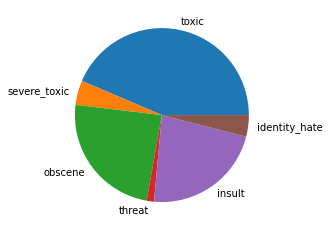

In [ ]:
plt.pie(x=hate_tag_count.values,labels=hate_tag_count.index)
plt.show()

Text(0.5, 0, 'Tag type')

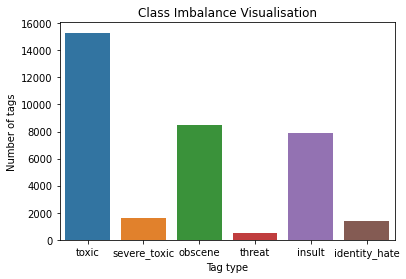

In [ ]:
sns.barplot(x=hate_tag_count.index, y=hate_tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')


In [ ]:
#Add an additional column for clean comments
train['clean']=(train.iloc[:,2:].sum(axis=1)==0).astype(int)

In [ ]:
train

id  ... clean
0       0000997932d777bf  ...     1
1       000103f0d9cfb60f  ...     1
2       000113f07ec002fd  ...     1
3       0001b41b1c6bb37e  ...     1
4       0001d958c54c6e35  ...     1
...                  ...  ...   ...
159566  ffe987279560d7ff  ...     1
159567  ffea4adeee384e90  ...     1
159568  ffee36eab5c267c9  ...     1
159569  fff125370e4aaaf3  ...     1
159570  fff46fc426af1f9a  ...     1

[159571 rows x 9 columns]

In [ ]:
tag_count=train.iloc[:,2:].sum()
tag_count

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

In [ ]:
print("Total comments = ",len(train))
print("Total clean comments = ",train['clean'].sum())
print("Total hate tags =",hate_tag_count.sum())
print("Total hate comments =",len(train)-train['clean'].sum())

Total comments =  159571
Total clean comments =  143346
Total hate tags = 35098
Total hate comments = 16225


In [ ]:
#Check for missing values in Train dataset
nulls=train.isnull().sum().sum()
print('No. of null values =', nulls)

No. of null values = 0


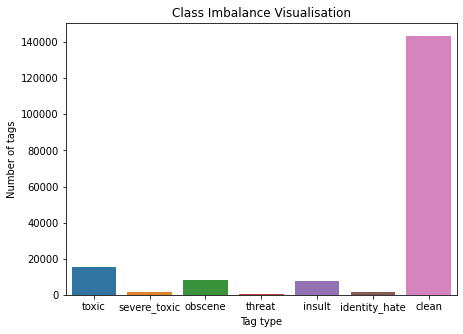

In [ ]:
#plot
plt.figure(figsize=(7,5))
ax= sns.barplot(tag_count.index, tag_count.values)
plt.title("Class Imbalance Visualisation")
plt.ylabel('Number of tags')
plt.xlabel('Tag type')
plt.show()

In [ ]:
multi_tag=train.iloc[:,2:].sum(axis=1).value_counts()
multi_tag

1    149706
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

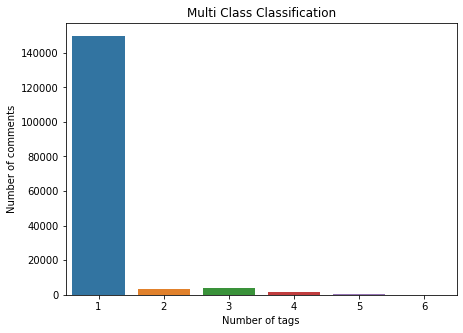

In [ ]:
plt.figure(figsize=(7,5))
ax= sns.barplot(multi_tag.index, multi_tag.values)
plt.title("Multi Class Classification")
plt.ylabel('Number of comments')
plt.xlabel('Number of tags')
plt.show()

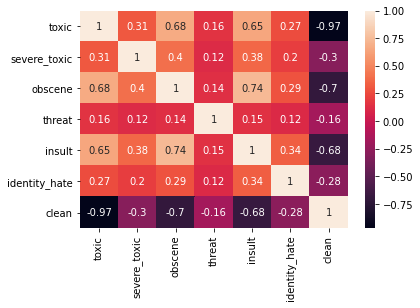

In [ ]:
corr=train.iloc[:,2:].corr()
sns.heatmap(corr,annot=True)

In [ ]:
print("identity_hate:")
print(train[train.identity_hate==1].iloc[28,1])

identity_hate:
"
Actually I am fully Arabic and Islamic and the correct spelling unlike how you stupid christians have been spelling it is ""Mou'ammar Al Qadhdhaffy"". But you are all too racist and white and stupid too accept that124.180.159.192  "


In [ ]:
import re
df=train.copy()
df['count_sent']=df["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)
df['count_word']=df["comment_text"].apply(lambda x: len(str(x).split()))
df['count_unique_word']=df["comment_text"].apply(lambda x: len(set(str(x).split())))
df['count_letters']=df["comment_text"].apply(lambda x: len(str(x)))

In [ ]:
df_counts=df[['count_sent','count_word','count_unique_word','count_letters']]


In [ ]:
df_counts.describe()

count_sent     count_word  count_unique_word  count_letters
count  159571.00000  159571.000000      159571.000000  159571.000000
mean        3.52074      67.273527          48.097323     394.073221
std         5.96225      99.230702          54.436443     590.720282
min         1.00000       1.000000           1.000000       6.000000
25%         1.00000      17.000000          16.000000      96.000000
50%         2.00000      36.000000          31.000000     205.000000
75%         3.00000      75.000000          59.000000     435.000000
max       313.00000    1411.000000         816.000000    5000.000000

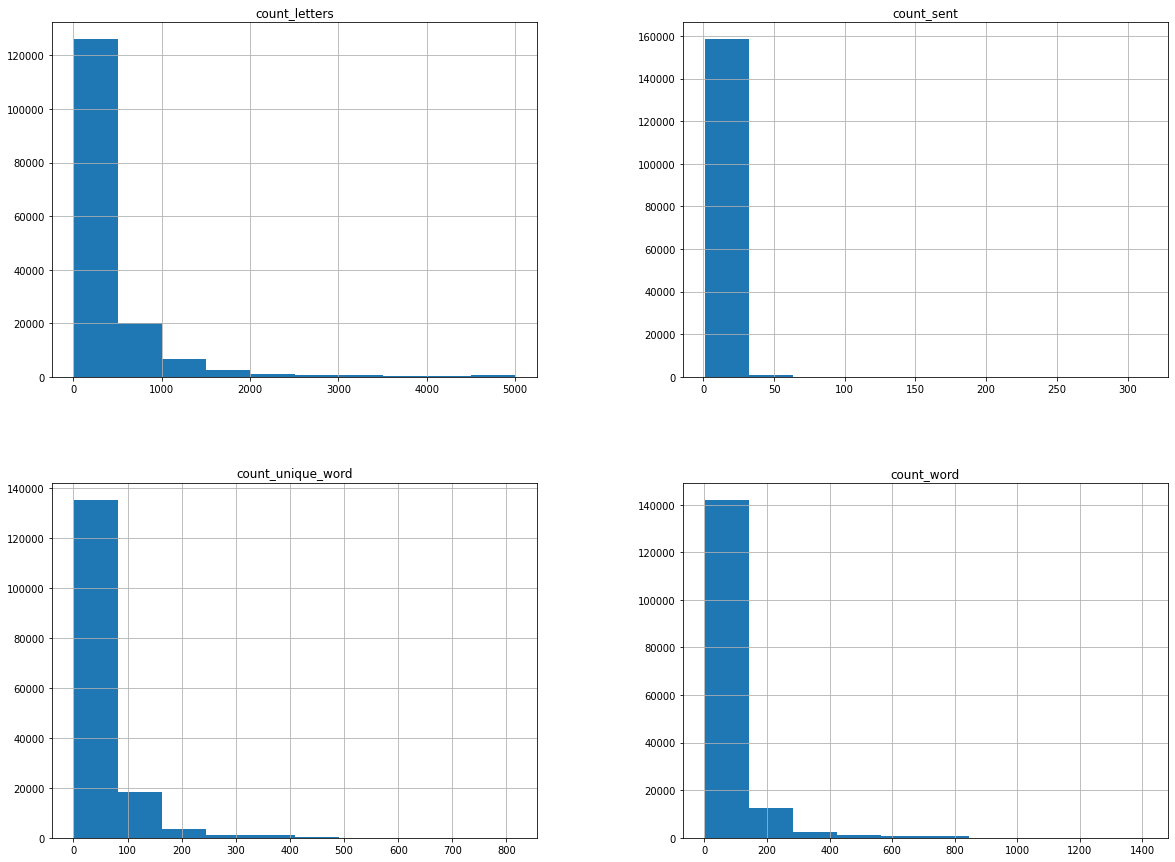

In [ ]:
ax=df_counts.hist(figsize=(20,15))

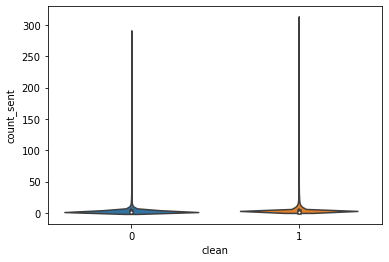

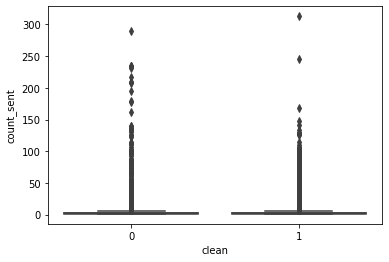

In [ ]:
sns.violinplot(y='count_sent',x='clean', data=df)
plt.show()
sns.boxplot(y='count_sent',x='clean', data=df)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


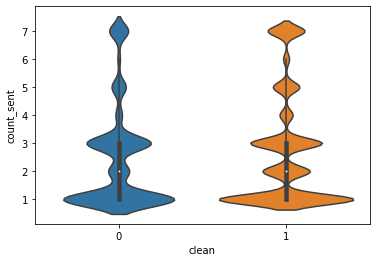

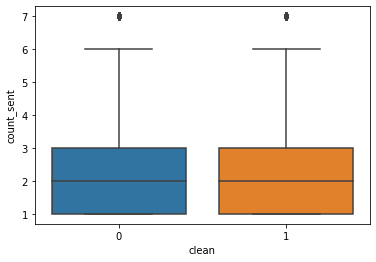

In [ ]:
df1=df.copy()
df1['count_sent'].loc[df1['count_sent']>7]=7
sns.violinplot(y='count_sent',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_sent',x='clean', data=df1)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


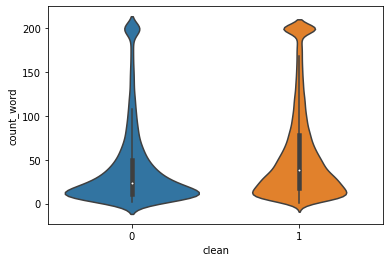

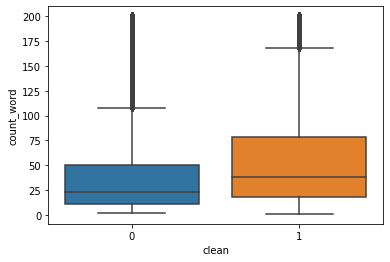

In [ ]:
df1=df.copy()
df1['count_word'].loc[df1['count_word']>200]=200
sns.violinplot(y='count_word',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_word',x='clean', data=df1)
plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


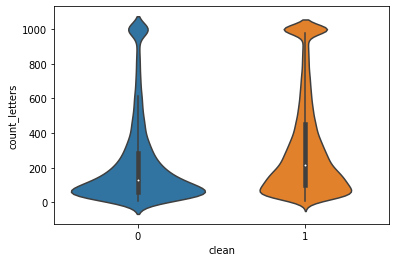

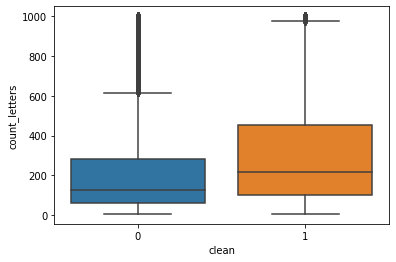

In [ ]:
df1=df.copy()
df1['count_letters'].loc[df1['count_letters']>1000]=1000
sns.violinplot(y='count_letters',x='clean', data=df1)
plt.show()
sns.boxplot(y='count_letters',x='clean', data=df1)
plt.show()


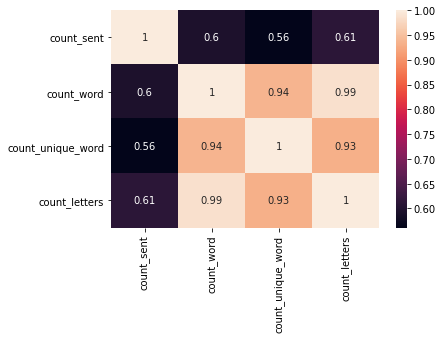

In [ ]:
corr=df.iloc[:,-4:].corr()
sns.heatmap(corr,annot=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


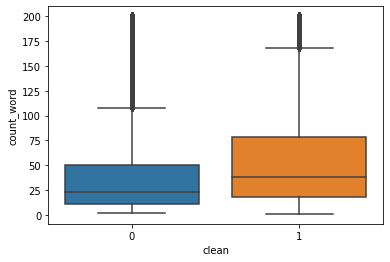

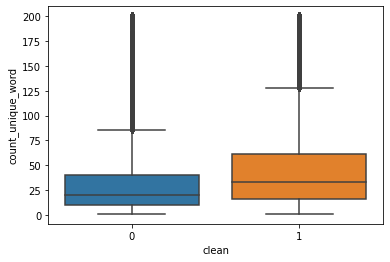

In [ ]:
df1=df.copy()
df1['count_word'].loc[df1['count_word']>200]=200
sns.boxplot(y='count_word',x='clean', data=df1)
df1['count_unique_word'].loc[df1['count_unique_word']>200]=200
plt.show()
sns.boxplot(y='count_unique_word',x='clean', data=df1)

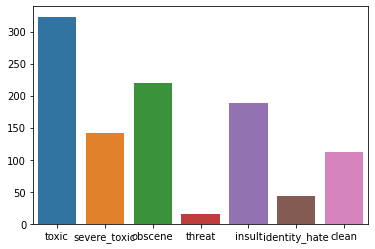

In [ ]:
#Spammers more toxic?
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
spammers=df[df['word_unique_percent']<25]
x=spammers.iloc[:,2:9].sum()
ax=sns.barplot(x=x.index, y=x.values)

Text(0.5, 0, 'Number of letters')

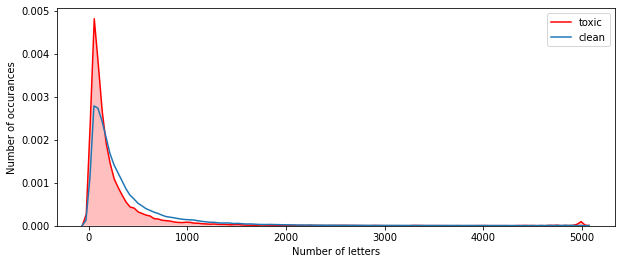

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_letters, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_letters, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of letters')

Text(0.5, 0, 'Number of words')

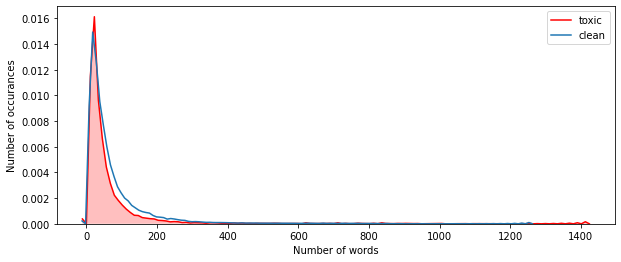

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_word, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_word, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of words')

Text(0.5, 0, 'Number of sentences')

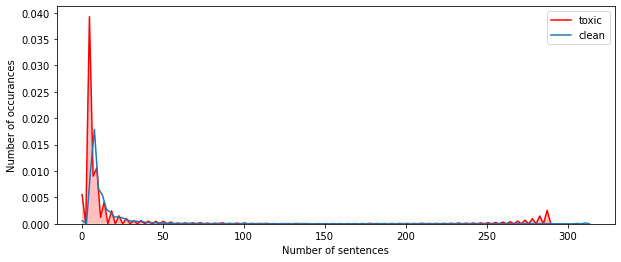

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.kdeplot(df[df.clean == 0].count_sent, label="toxic",shade=True,color='r')
ax=sns.kdeplot(df[df.clean == 1].count_sent, label="clean")
plt.legend()
plt.ylabel('Number of occurances')
plt.xlabel('Number of sentences')

In [ ]:
path='/content/drive/My Drive/Colab_data/Data_Mining/Data-Mining-Project/dataset'

In [ ]:
"""Un-Comment For Running locally out of colab
path='./dataset'
"""#Un-Comment For Running locally out of colab 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")
train=train[:100000]

In [ ]:
train.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
import re

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean(comment):
  comment = comment.lower()
  comment = re.sub('[^a-zA-Z]',' ', comment)
  comment = comment.strip()
  comment = comment.split()
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()
  comment = [stemmer.stem(word) for word in comment if word not in stop_words and len(word)<30]
  comment = ' '.join(comment)
  return comment

In [ ]:
def vectorise(comments):
  vectorizer = CountVectorizer(max_features=5000)
  X = vectorizer.fit_transform(comments)
  return X.toarray()

In [ ]:
raw_comments= list(train['comment_text'])
len(raw_comments)

100000

In [ ]:
# raw_comments[5606+110000] #Led to recursion error while stemming!!!!!

In [ ]:
comments=[]
for i,com in enumerate(raw_comments):
  if(i%10000==0): print(i)
  try:
    comments.append(clean(com))
  except:
    print(i,com)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [ ]:
x=vectorise(comments)
x.shape

(100000, 5000)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
labels=train.iloc[:,2:]
labels.head(10)

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0

In [ ]:
classes=list(labels.columns)
classes

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
labels.head(10)

toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0
5      0             0        0       0       0              0
6      1             1        1       0       1              0
7      0             0        0       0       0              0
8      0             0        0       0       0              0
9      0             0        0       0       0              0

In [ ]:
y=[]
for idx,row in labels.iterrows():
  y.append(row.values)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
model = MultinomialNB()

train_acc = []
val_acc = []

preds_train = []
preds_val = []

f1_val = []

for i, label_name in enumerate(classes):
    print('Class: ',label_name)
    model.fit(X_train,y_train[:,i])
  
    preds_train_class = model.predict(X_train)
    train_acc_class = accuracy_score(y_train[:,i], preds_train_class)
    print('Train Accuracy:', train_acc_class)
    train_acc.append(train_acc_class)
    preds_train.append(preds_train_class)

    preds_val_class = model.predict(X_val)
    val_acc_class = accuracy_score(y_val[:,i], preds_val_class)
    print('Val Accuracy:', val_acc_class)
    val_acc.append(val_acc_class)
    preds_val.append(preds_val_class)

    cm = confusion_matrix(y_val[:,i], preds_val_class)
    print(cm)

    tn, fp, fn, tp = cm.ravel()
    precision= tp/(tp+fp+1e-5)
    recall= tp/(tp+fn+1e-5)
    f1_score= (2*precision*recall)/(precision+recall+1e-5)
    print('precision {:.4f} recall {:.4f} F1 score {:.4f}:'.format(precision,recall,f1_score))
    f1_val.append(f1_score)

    print()
    
print('mean train accuracy : ', np.mean(train_acc))
print('mean val accuracy :', np.mean(val_acc))
print('mean val F1 score :', np.mean(f1_val))

Class:  toxic
Train Accuracy: 0.95235
Val Accuracy: 0.94945
[[17648   402]
 [  609  1341]]
precision 0.7694 recall 0.6877 F1 score 0.7262:

Class:  severe_toxic
Train Accuracy: 0.984325
Val Accuracy: 0.9826
[[19508   287]
 [   61   144]]
precision 0.3341 recall 0.7024 F1 score 0.4528:

Class:  obscene
Train Accuracy: 0.9713875
Val Accuracy: 0.9685
[[18559   380]
 [  250   811]]
precision 0.6809 recall 0.7644 F1 score 0.7202:

Class:  threat
Train Accuracy: 0.99025
Val Accuracy: 0.9891
[[19754   185]
 [   33    28]]
precision 0.1315 recall 0.4590 F1 score 0.2044:

Class:  insult
Train Accuracy: 0.964775
Val Accuracy: 0.96215
[[18561   465]
 [  292   682]]
precision 0.5946 recall 0.7002 F1 score 0.6431:

Class:  identity_hate
Train Accuracy: 0.98105
Val Accuracy: 0.97945
[[19490   352]
 [   59    99]]
precision 0.2195 recall 0.6266 F1 score 0.3251:

mean train accuracy :  0.9740229166666667
mean val accuracy : 0.9718749999999999
mean val F1 score : 0.5119811032175334
